# Slab Subduction

This two dimensional subduction model has a dense, high viscosity 3 layered plate overlying a lower viscosity mantle. The upper and lower plate layers have a visco-plastic rheology, yielding under large stresses. The middle, core layer has a viscous only rheology, maintaining strength during bending. The top 1000 km of the mantle is included, the upper & lower mantle is partitioned with a viscosity contrast of 100x at 600 km depth. The velocity boundary conditions on the domain are period side, free-slip top and no-slip bottom wall. 

**References**

1. OzBench, M.; Regenauer-Lieb, K.; Stegman, D. R.; Morra, G.; Farrington, R.; Hale, A.; May, D. A.; Freeman, J.; Bourgouin, L.; Mühlhaus, H. & Moresi, L. A model comparison study of large-scale mantle-lithosphere dynamics driven by subduction. Physics of the Earth and Planetary Interiors, 2008, 171, 224-234. [OzBench, 2008](http://www.sciencedirect.com/science/article/pii/S0031920108002318)

In [1]:
import UWGeodynamics as GEO
from UWGeodynamics import visualisation as vis

loaded rc file /workspace/user_data/UWGeodynamics/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
Model = GEO.Model(elementRes=(192, 48), 
                  minCoord=(0., 0.), 
                  maxCoord=(4., 1.),
                  gravity=(0., -1.),
                  periodic=(True, False))

In [ ]:
Model.outputDir = "1_07_SlabSubduction"

# Material Layout

In [3]:
upperMantleShape = GEO.shapes.Layer(top=Model.top, bottom=0.4)
lowerMantleShape = GEO.shapes.Layer(top=0.4, bottom=Model.bottom)
lowerSlabShape = GEO.shapes.Polygon([ (1.2,0.925 ), (3.25,0.925 ), (3.20,0.900), (1.2,0.900), (1.02,0.825), (1.02,0.850) ])
coreSlabShape = GEO.shapes.Polygon([ (1.2,0.975 ), (3.35,0.975 ), (3.25,0.925), (1.2,0.925), (1.02,0.850), (1.02,0.900) ])
upperSlabShape = GEO.shapes.Polygon([ (1.2,1.000 ), (3.40,1.000 ), (3.35,0.975), (1.2,0.975), (1.02,0.900), (1.02,0.925) ])

In [4]:
upperMantle = Model.add_material(name="Upper Mantle", shape=upperMantleShape)
lowerMantle = Model.add_material(name="Lower Mantle", shape=lowerMantleShape)
upperSlab   = Model.add_material(name="Upper Slab", shape=upperSlabShape)
lowerSlab   = Model.add_material(name="Lower Slab", shape=lowerSlabShape)
coreSlab    = Model.add_material(name="Core Slab", shape=coreSlabShape)

## Material properties

In [5]:
upperMantle.viscosity =    1.0
lowerMantle.viscosity =  100.0
upperSlab.viscosity   =  500.0
lowerSlab.viscosity   =  500.0
coreSlab.viscosity    =  500.0

In [6]:
upperMantle.density =  0.
lowerMantle.density =  0.
upperSlab.density   =  1.0
lowerSlab.density   =  1.0
coreSlab.density    =  1.0

In [7]:
upperSlab.plasticity   = GEO.VonMises(cohesion=0.06)
lowerSlab.plasticity   = GEO.VonMises(cohesion=0.06)


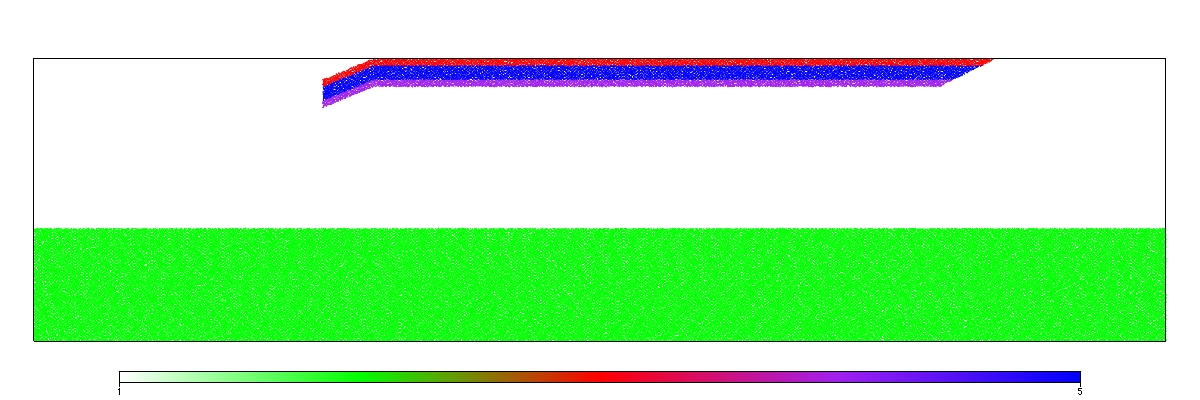

In [8]:
Fig = vis.Figure(figsize=(1200,400))
Fig.Points(Model.swarm, Model.materialField, fn_size=2.0, colours='white green red purple blue')
Fig.save("Figure_1.png")
Fig.show()

## Velocity Boundary Conditions

In [9]:
Model.set_velocityBCs(bottom=[0.,0.], top=[None, 0.])

## Run

In [10]:
Model.run_for(nstep=2)